In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.ndimage
import matplotlib.pyplot as plt
from skimage import io, measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import shutil
from skimage import morphology

In [12]:
path = './TCIA'

## 1. 종양 외부 15mm mask 생성 [파일: dilation15_mask]

099029.png


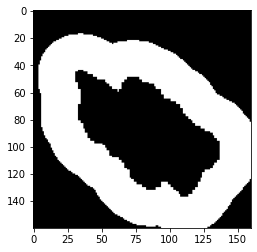

239031.png


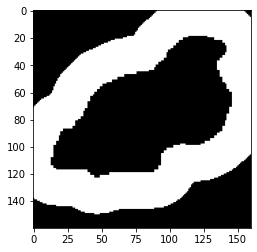

173037.png


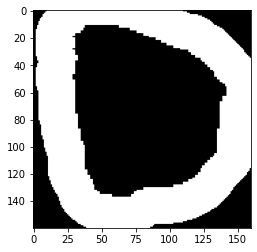

225035.png


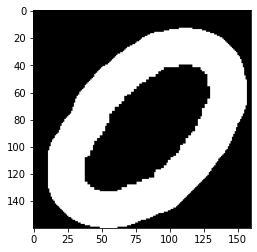

063033.png


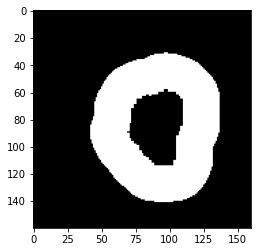

173036.png


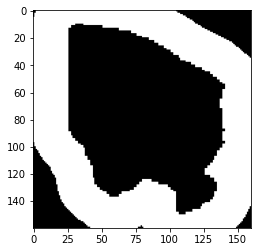

239030.png


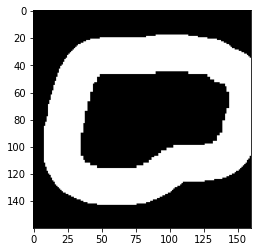

024032.png


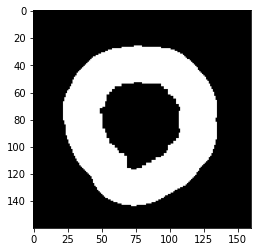

099028.png


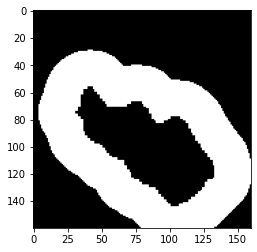

047032.png


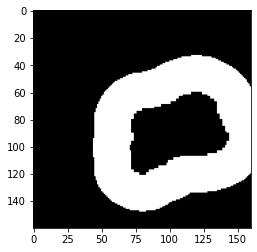

061034.png


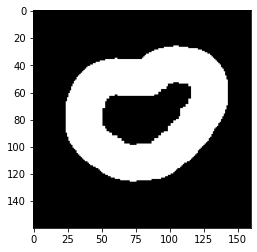

047030.png


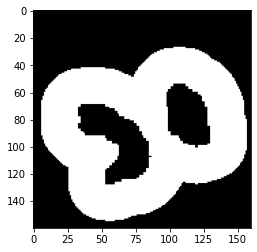

024030.png


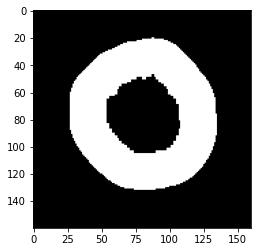

239032.png


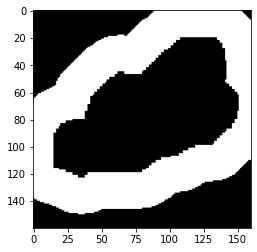

285040.png


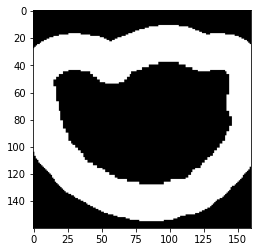

155030.png


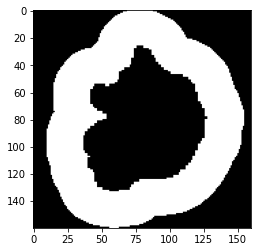

225037.png


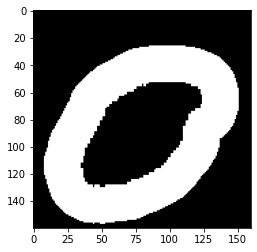

225036.png


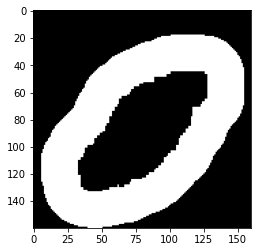

163030.png


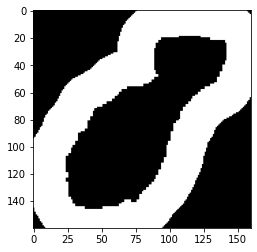

155031.png


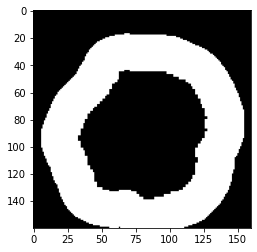

173035.png


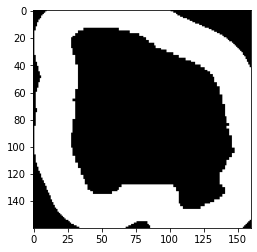

005028.png


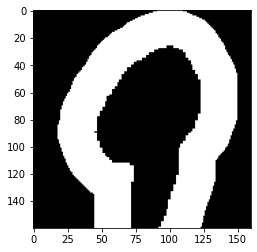

024031.png


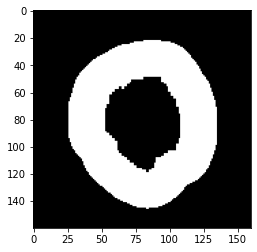

047031.png


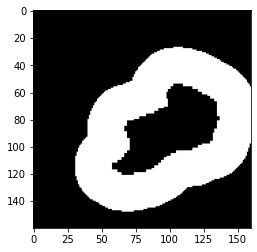

061035.png


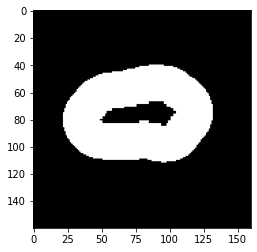

034030.png


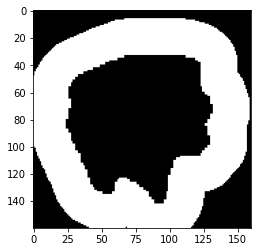

115029.png


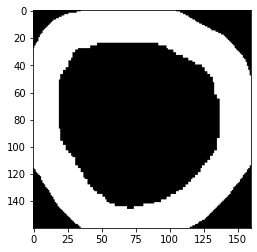

130040.png


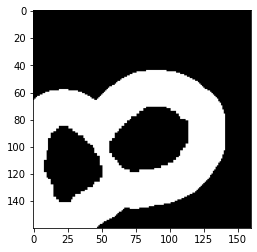

237032.png


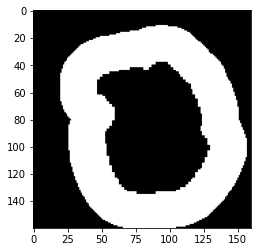

073031.png


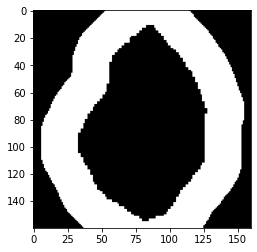

258026.png


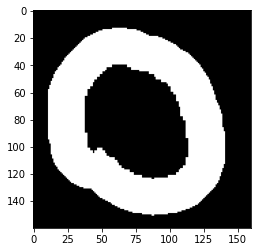

063034.png


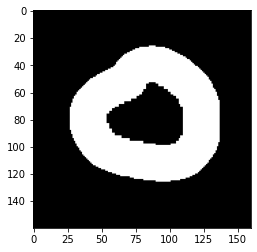

092032.png


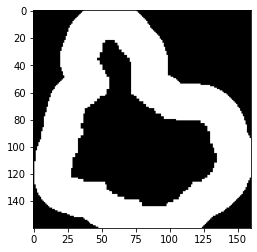

045030.png


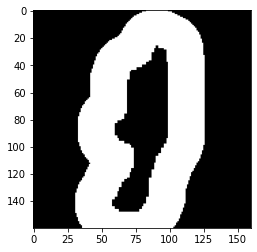

045031.png


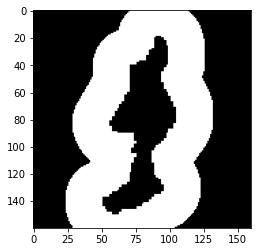

145031.png


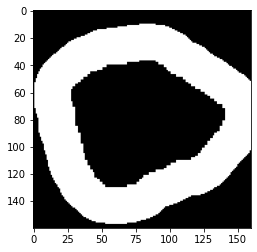

092033.png


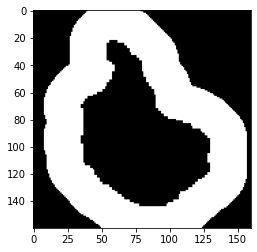

063035.png


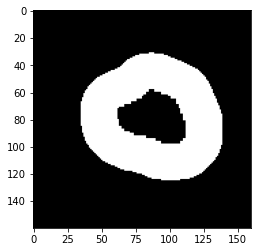

258027.png


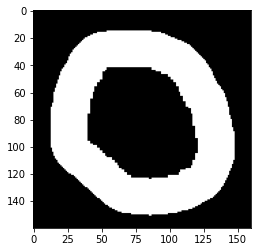

073030.png


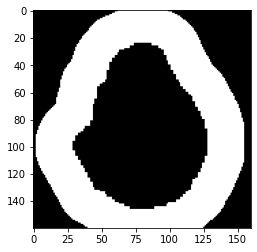

115028.png


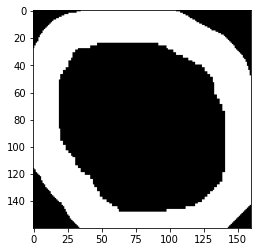

012035.png


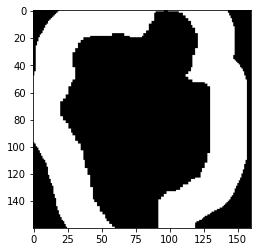

034031.png


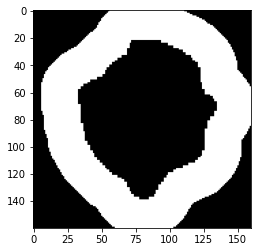

208028.png


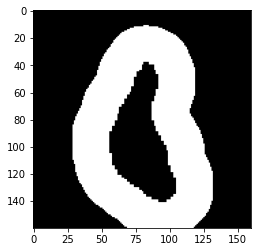

012037.png


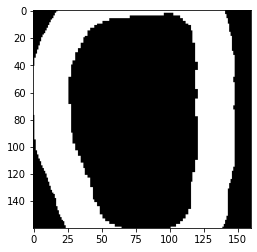

237031.png


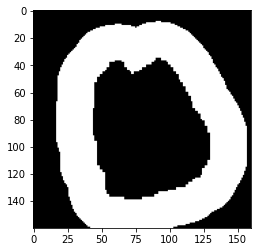

073032.png


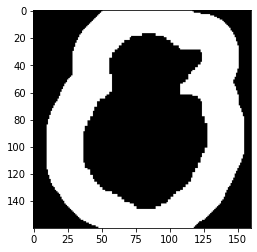

092031.png


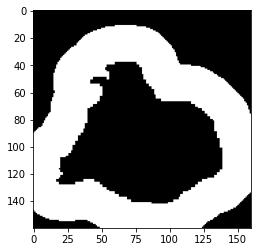

279028.png


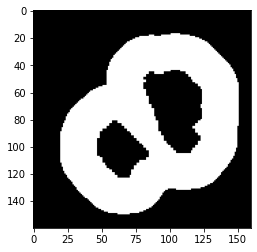

145033.png


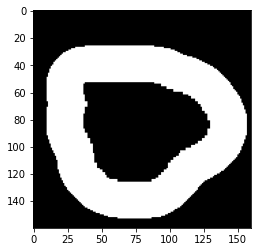

145032.png


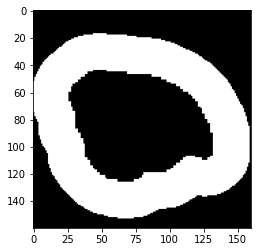

045032.png


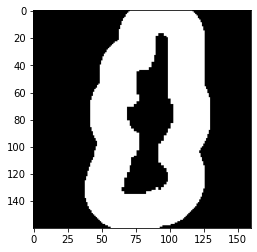

279029.png


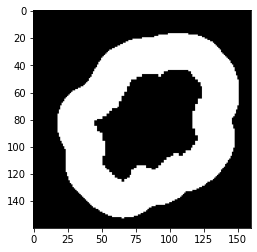

237030.png


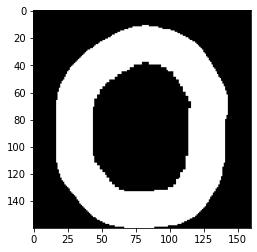

012036.png


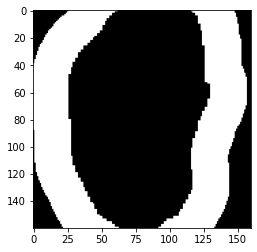

208029.png


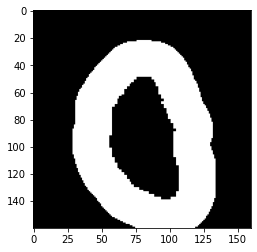

061033.png


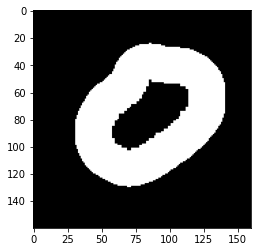

290029.png


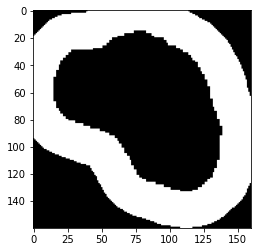

266032.png


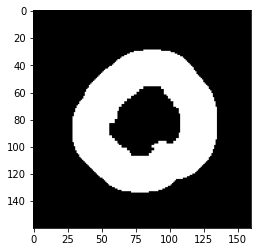

250033.png


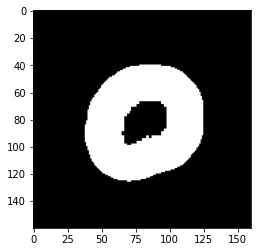

026041.png


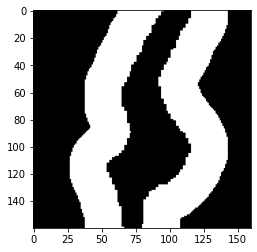

135029.png


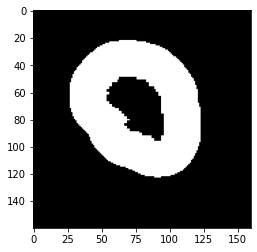

041031.png


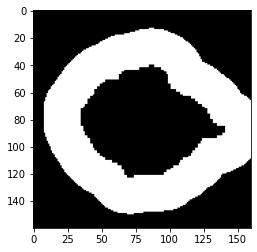

096033.png


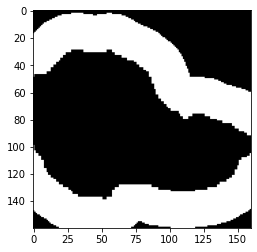

022031.png


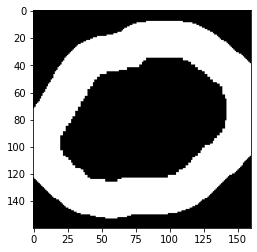

151034.png


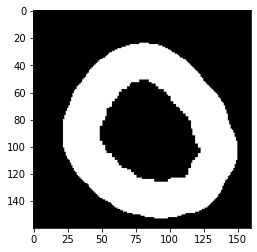

014031.png


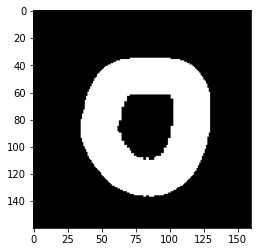

096032.png


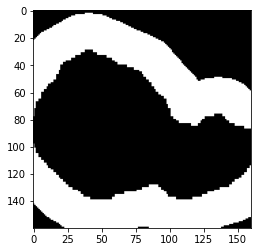

114031.png


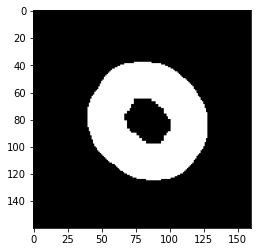

041030.png


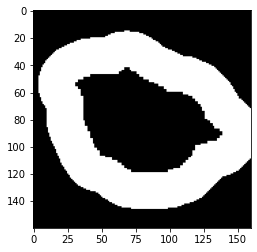

026040.png


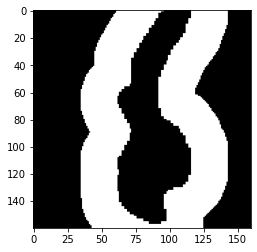

143035.png


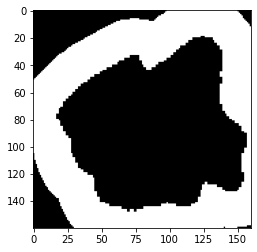

250032.png


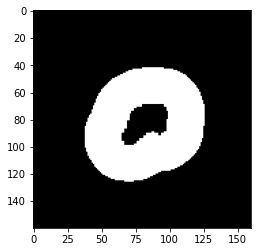

008034.png


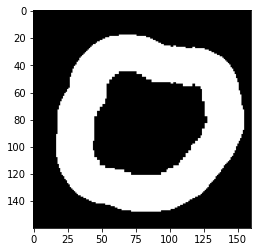

266033.png


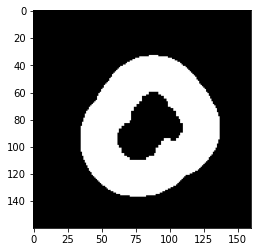

266031.png


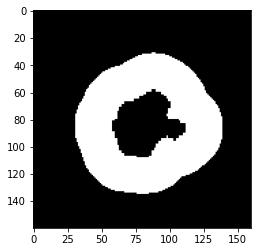

268034.png


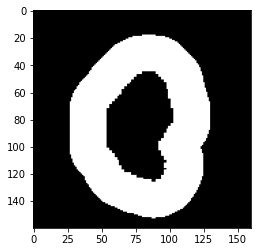

233024.png


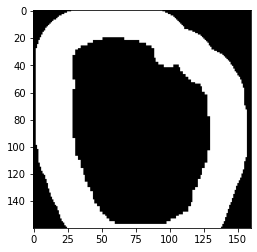

006033.png


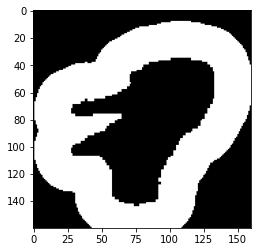

030032.png


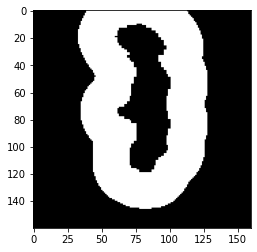

143037.png


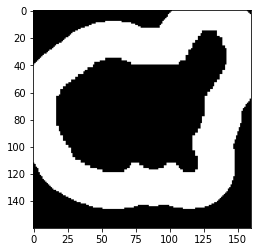

224028.png


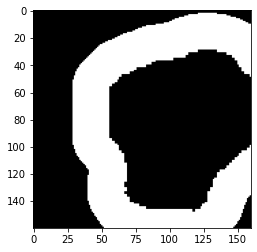

252035.png


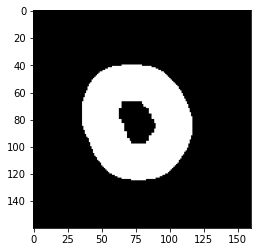

026042.png


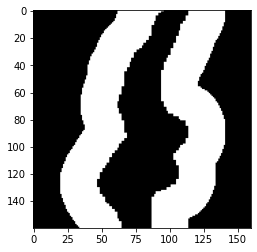

032023.png


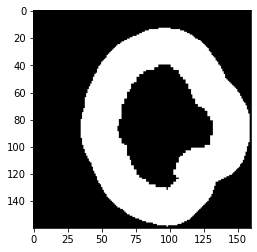

014033.png


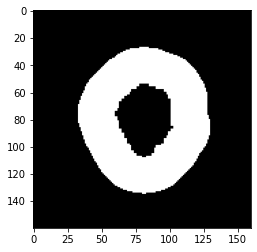

114033.png


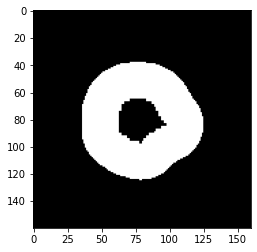

242030.png


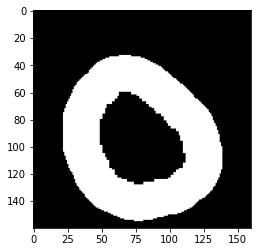

122032.png


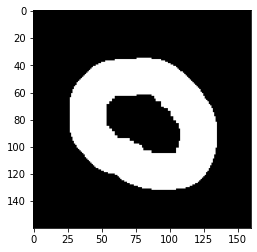

022032.png


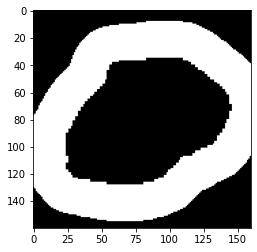

022033.png


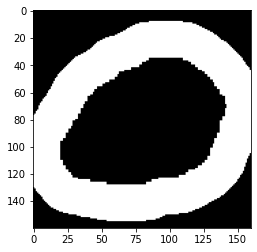

122033.png


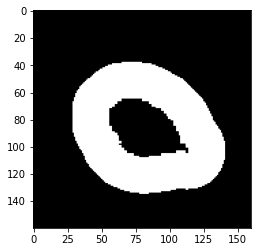

114032.png


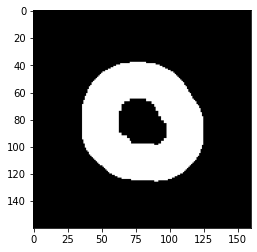

014032.png


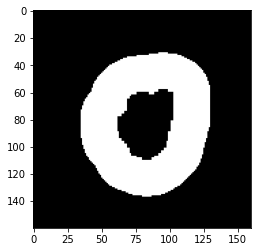

098034.png


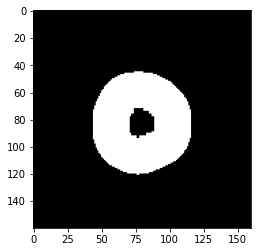

252034.png


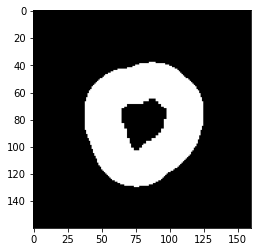

224029.png


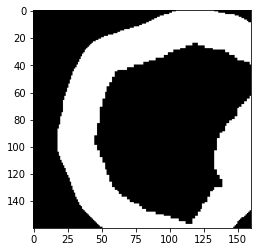

143036.png


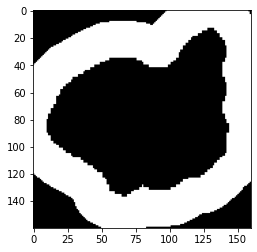

030033.png


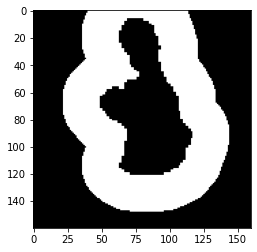

250031.png


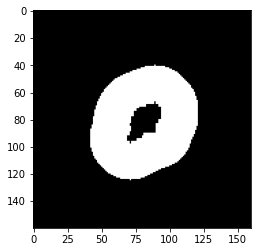

233025.png


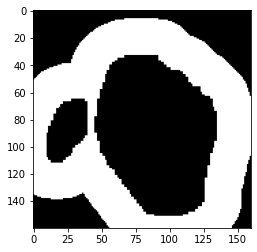

190040.png


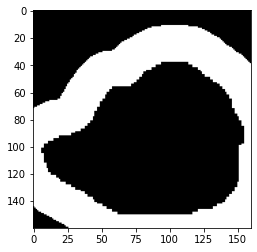

008033.png


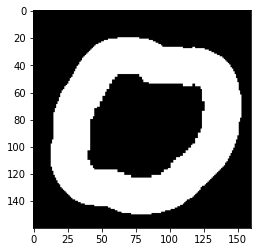

257028.png


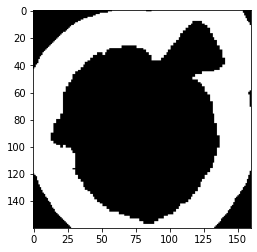

018036.png


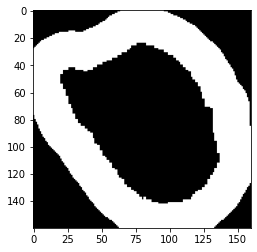

200038.png


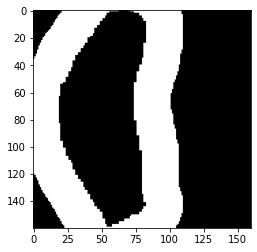

167033.png


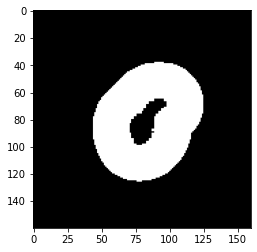

177036.png


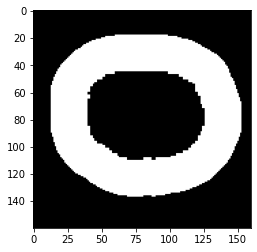

104027.png


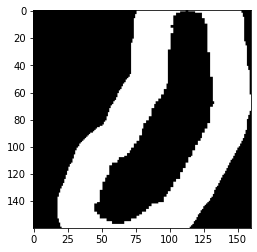

151032.png


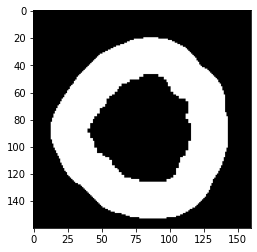

264031.png


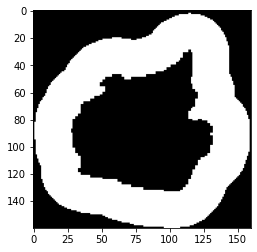

151033.png


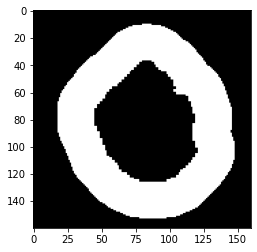

264030.png


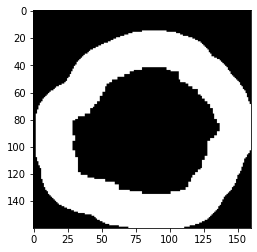

096034.png


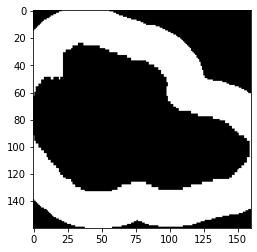

167032.png


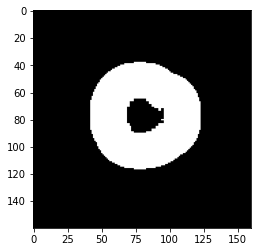

200039.png


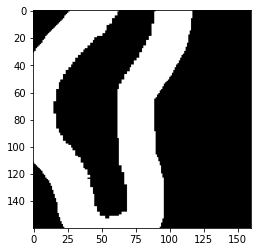

116032.png


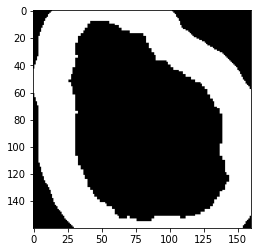

257029.png


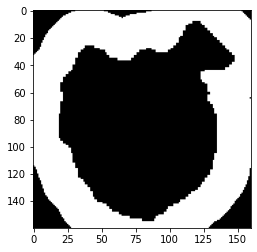

008032.png


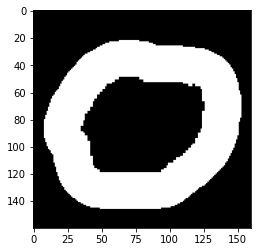

053036.png


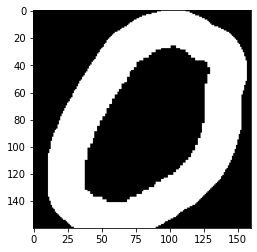

190041.png


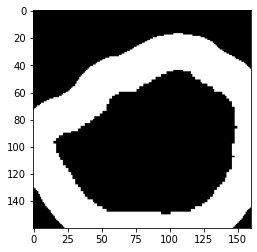

006035.png


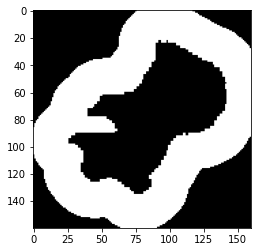

268032.png


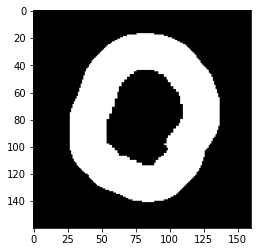

053034.png


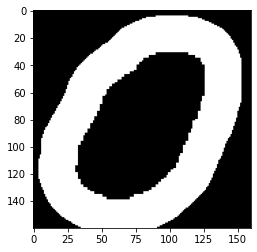

030034.png


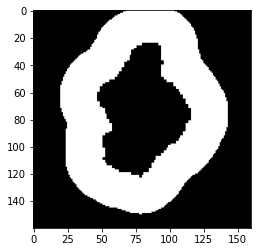

116030.png


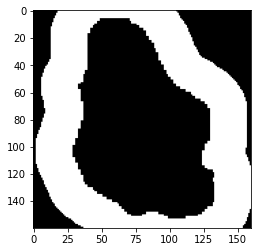

276026.png


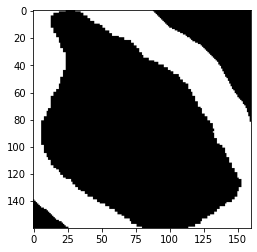

018035.png


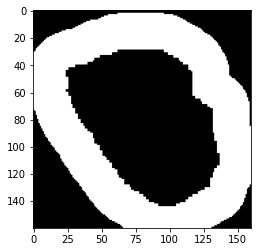

032025.png


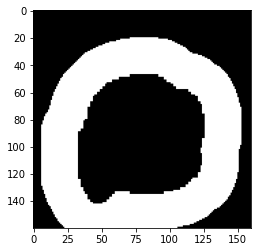

252033.png


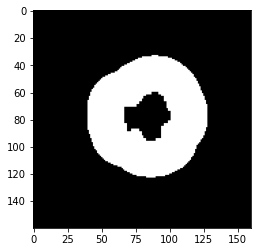

098033.png


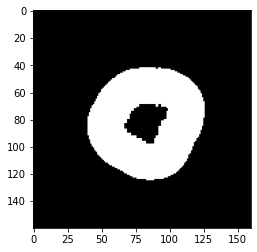

046029.png


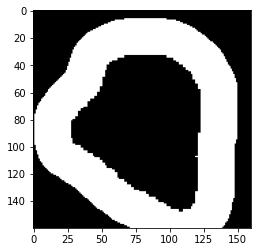

122034.png


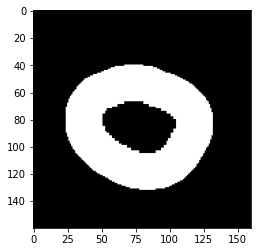

177035.png


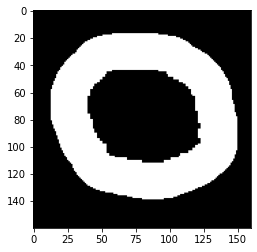

004030.png


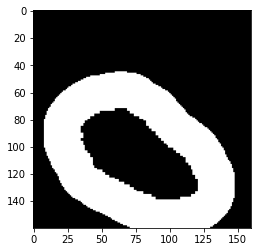

264032.png


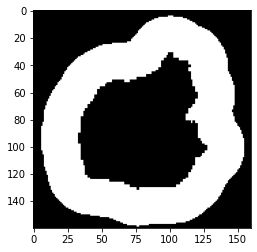

177034.png


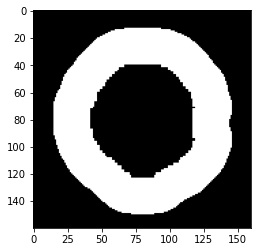

098032.png


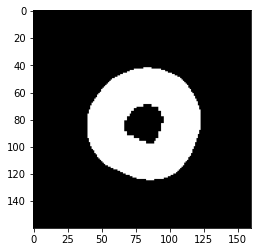

046028.png


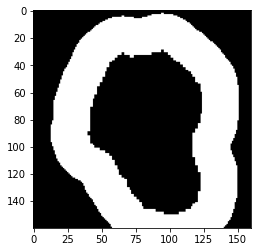

032024.png


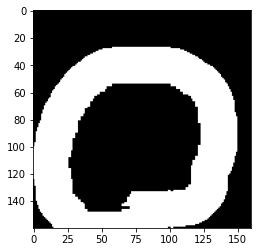

276027.png


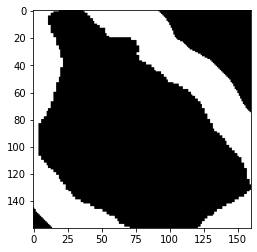

018034.png


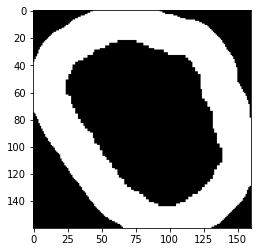

116031.png


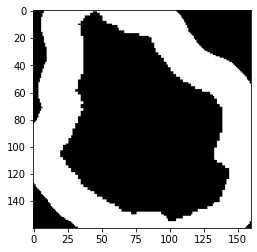

053035.png


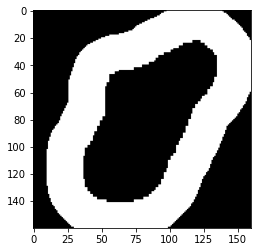

268033.png


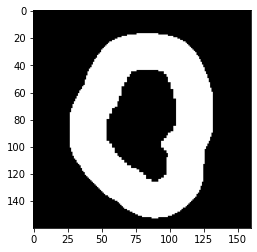

006034.png


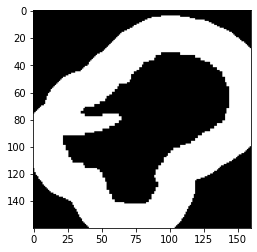

233023.png


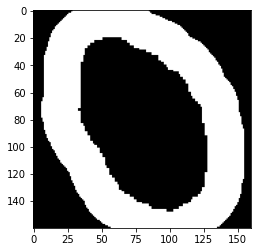

284041.png


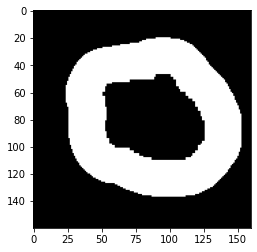

130038.png


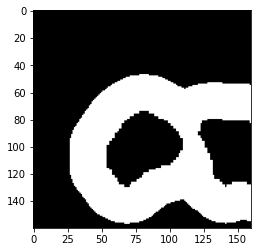

257027.png


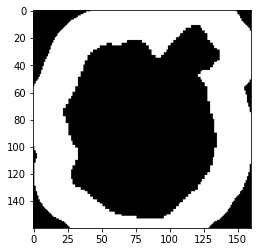

011035.png


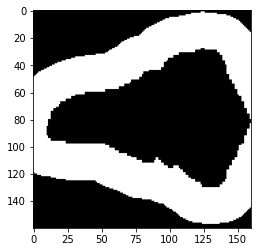

035034.png


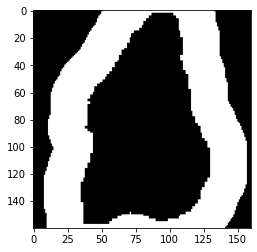

200037.png


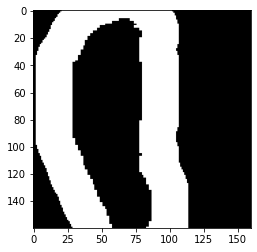

210032.png


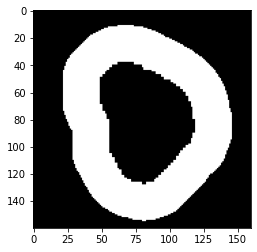

292031.png


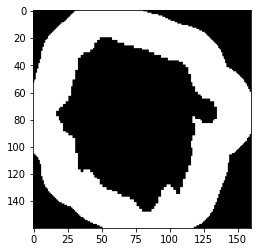

095043.png


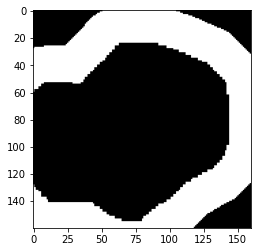

004028.png


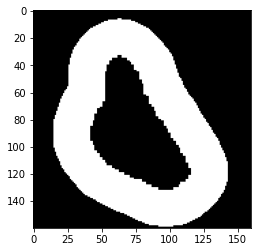

104028.png


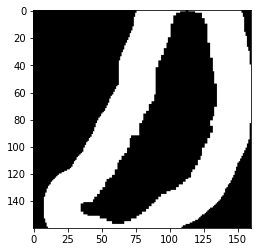

104029.png


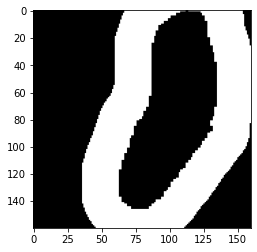

004029.png


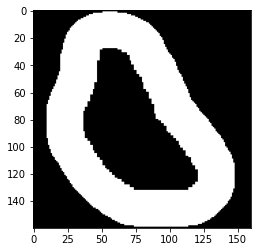

292030.png


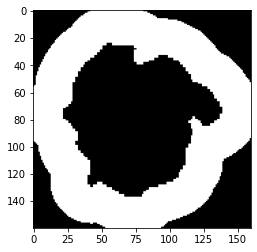

210033.png


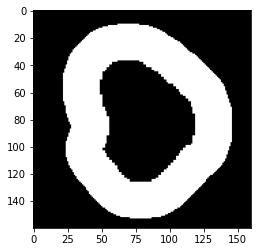

035035.png


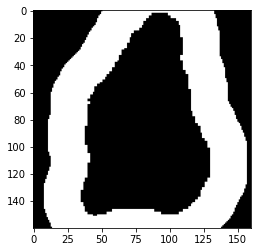

130039.png


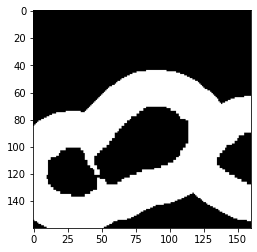

284040.png


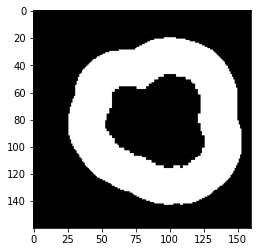

284042.png


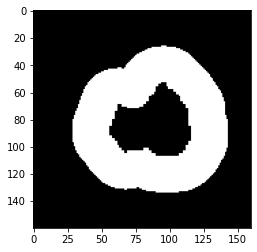

054032.png


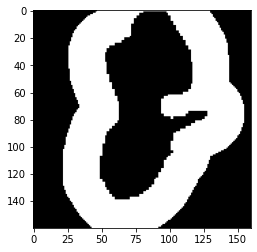

011036.png


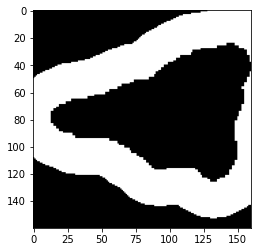

292032.png


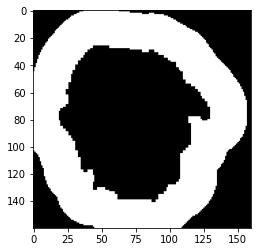

025033.png


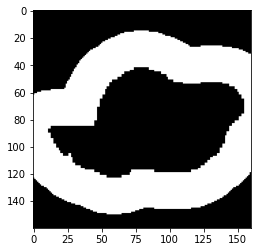

046027.png


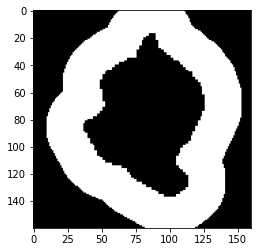

146033.png


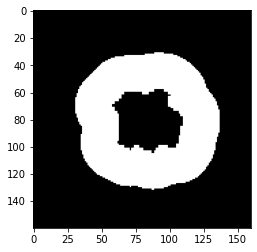

276028.png


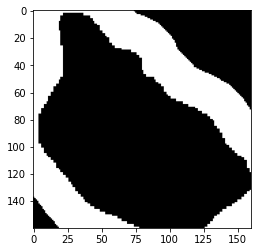

011037.png


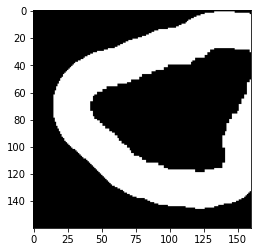

054033.png


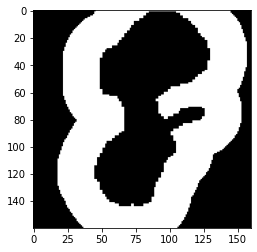

101036.png


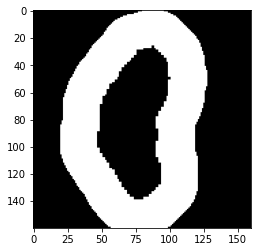

202034.png


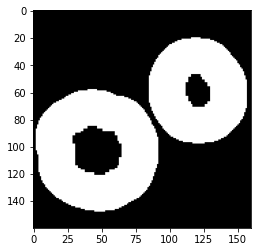

224030.png


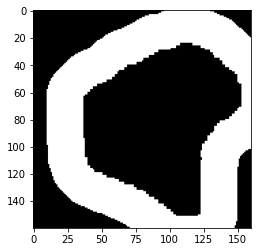

242028.png


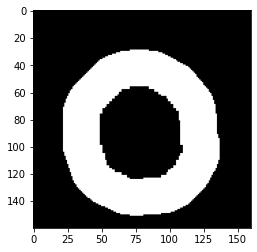

210034.png


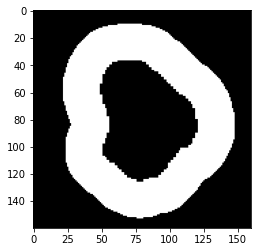

263031.png


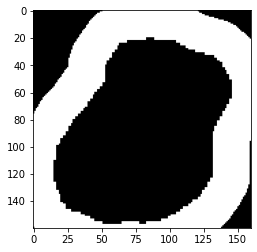

095045.png


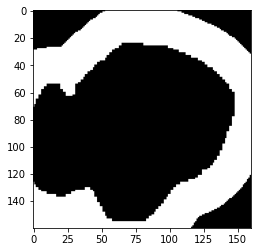

095044.png


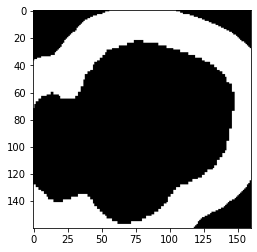

181031.png


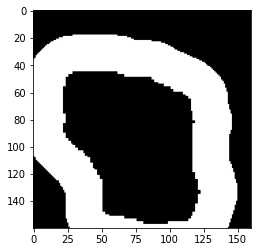

242029.png


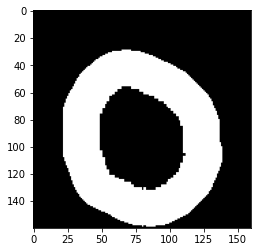

035033.png


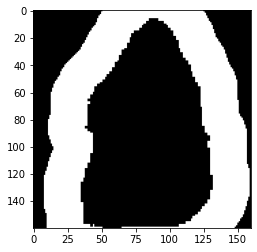

193025.png


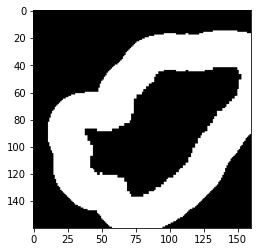

093031.png


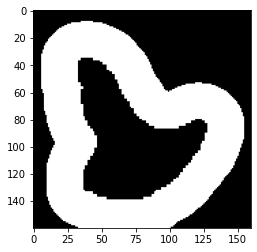

037036.png


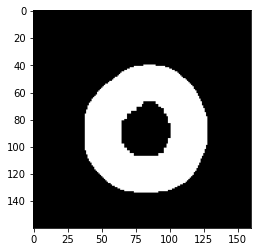

202035.png


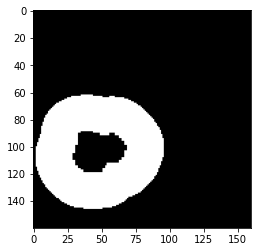

101037.png


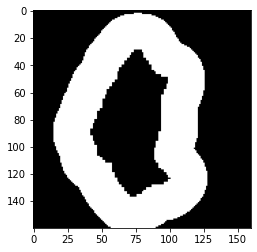

290031.png


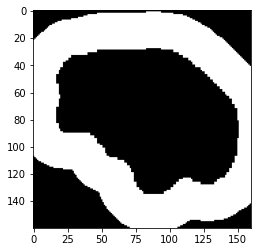

054034.png


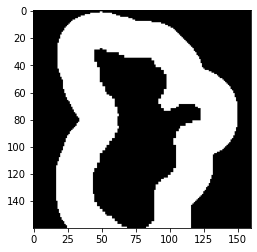

101035.png


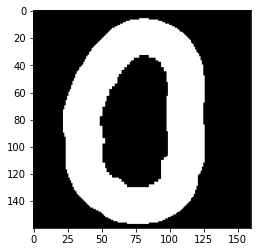

037034.png


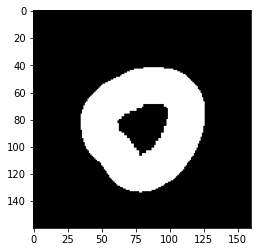

093033.png


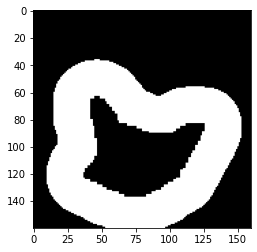

193027.png


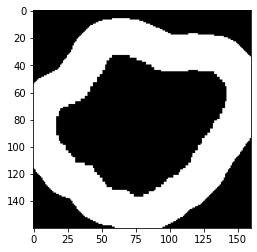

135031.png


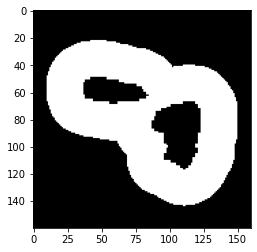

146034.png


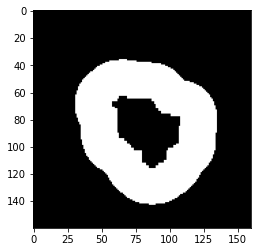

041029.png


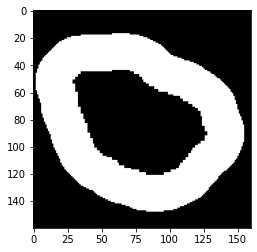

025034.png


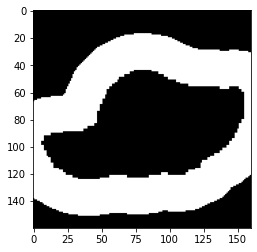

263032.png


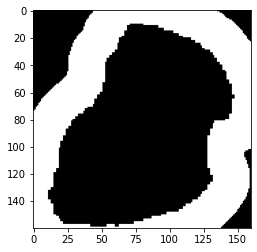

181033.png


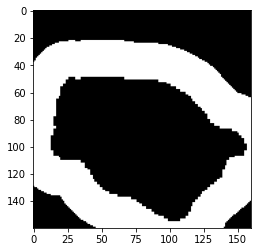

181032.png


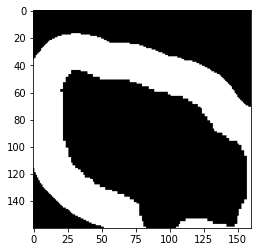

263033.png


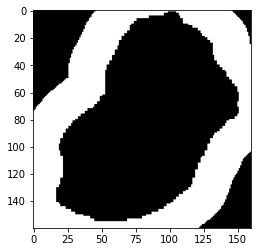

025035.png


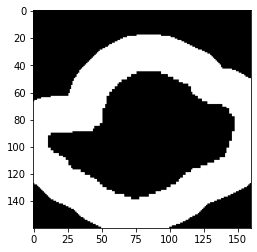

146035.png


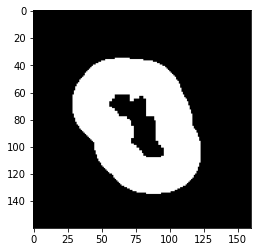

135030.png


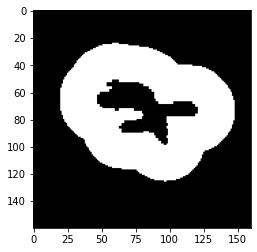

285039.png


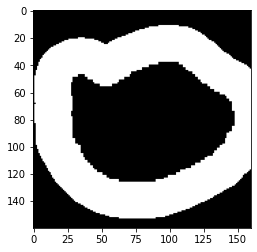

093032.png


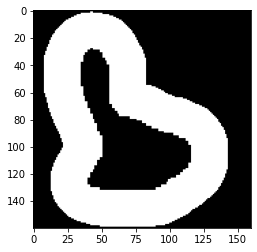

193026.png


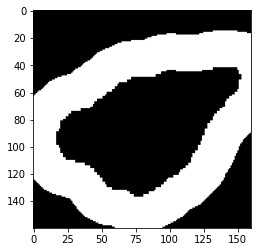

202036.png


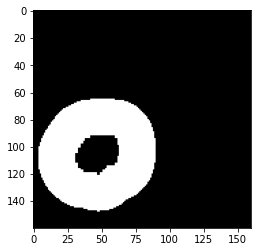

037035.png


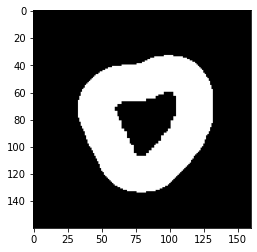

290030.png


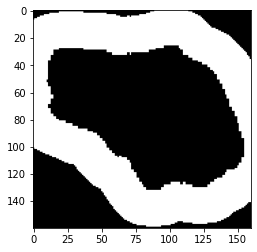

197031.png


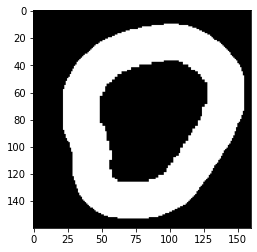

123033.png


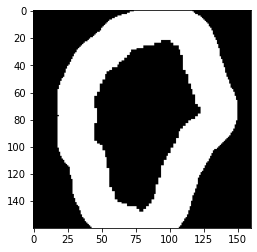

265035.png


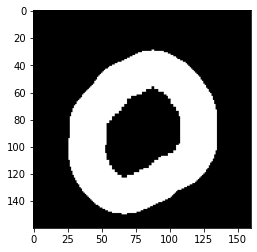

107032.png


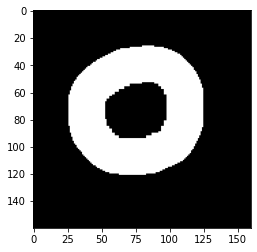

007032.png


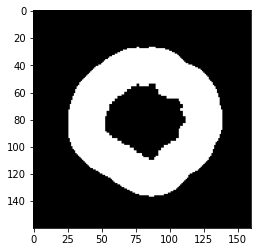

009037.png


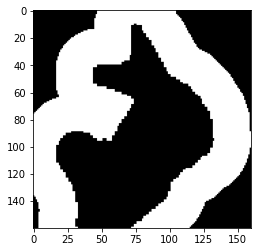

064032.png


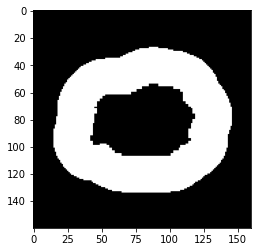

279030.png


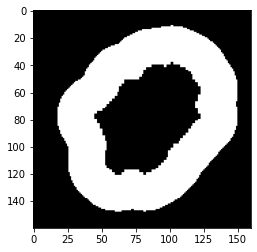

222035.png


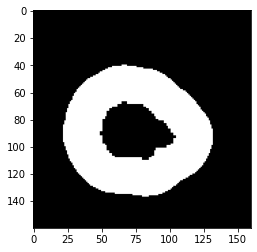

064033.png


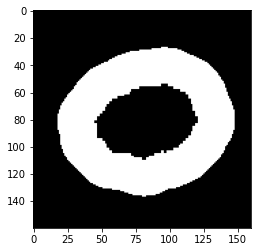

131032.png


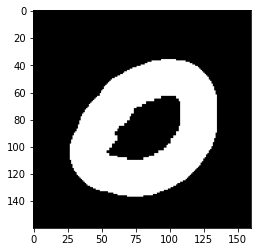

258028.png


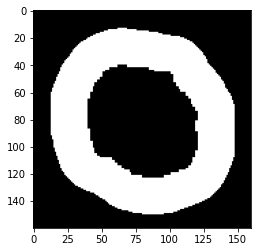

109036.png


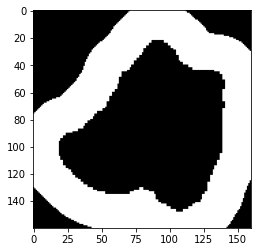

009036.png


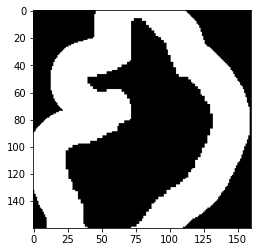

107033.png


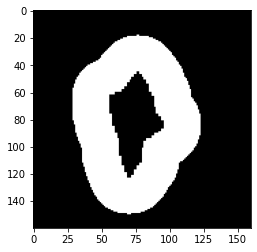

265034.png


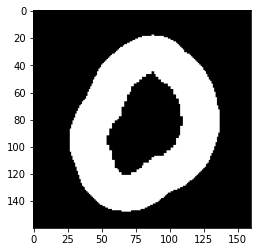

230035.png


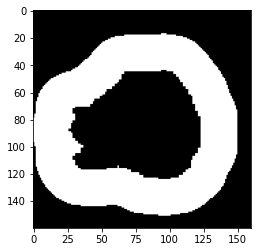

123032.png


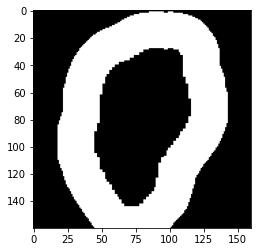

115027.png


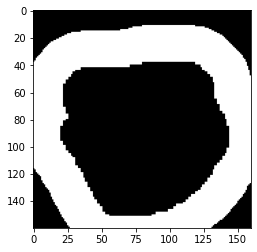

190039.png


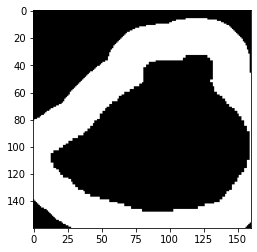

197030.png


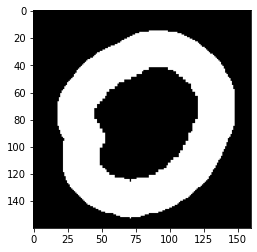

208027.png


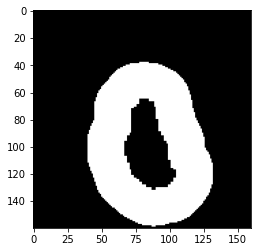

197032.png


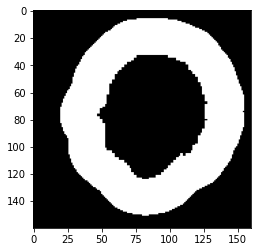

176031.png


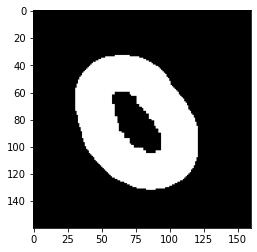

105034.png


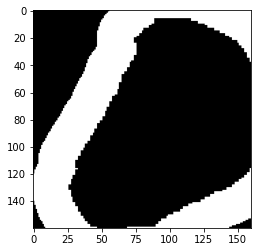

230037.png


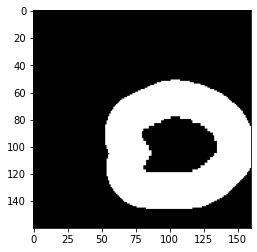

007031.png


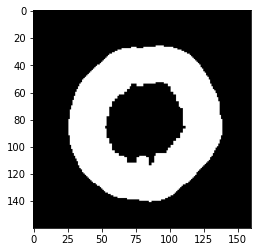

109034.png


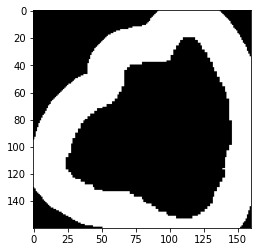

131030.png


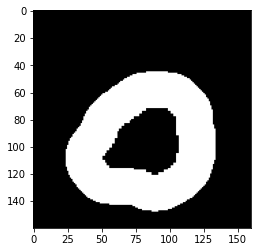

064031.png


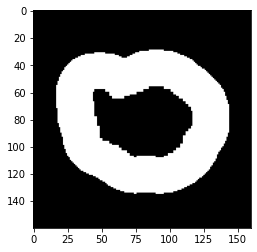

222037.png


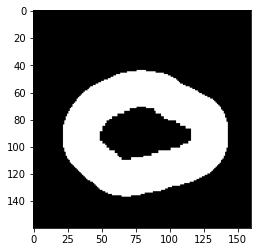

042035.png


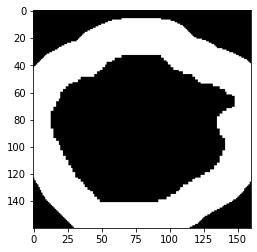

042034.png


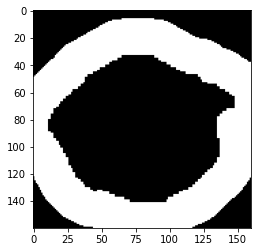

222036.png


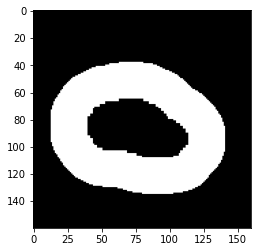

288034.png


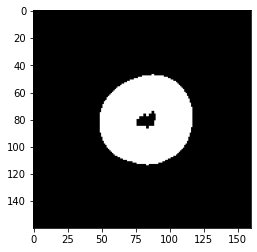

131031.png


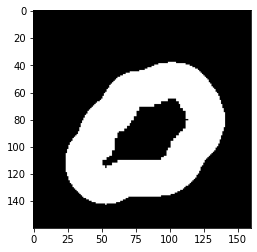

009035.png


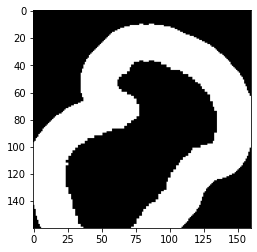

109035.png


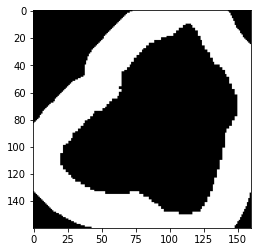

007030.png


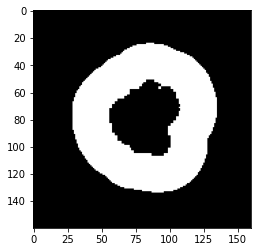

121034.png


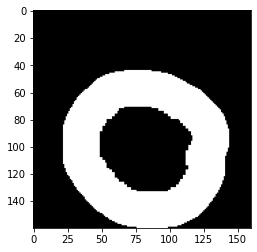

050034.png


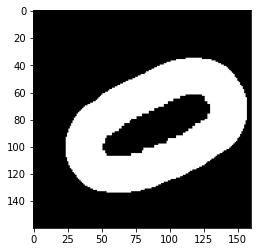

230036.png


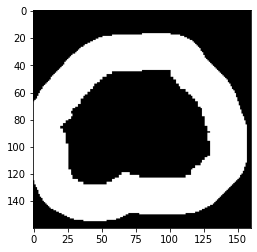

176030.png


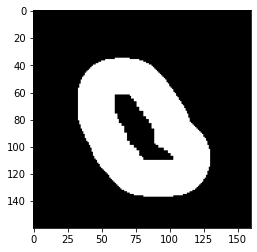

034029.png


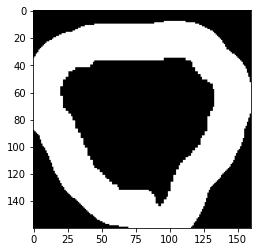

206033.png


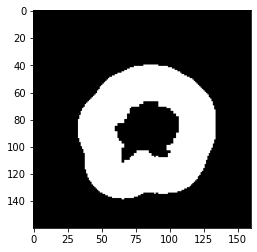

078031.png


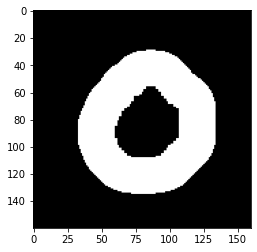

265033.png


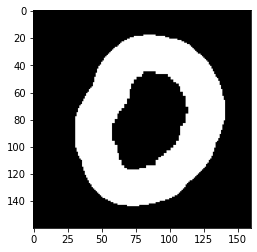

052035.png


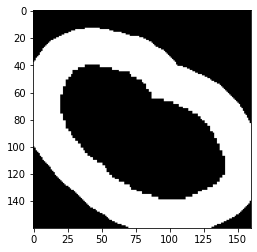

107034.png


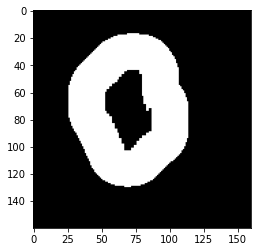

163029.png


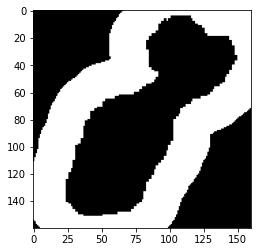

117025.png


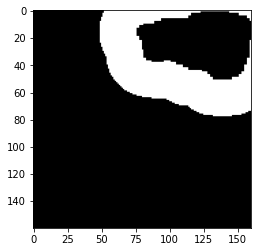

117024.png


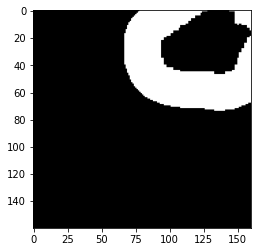

163028.png


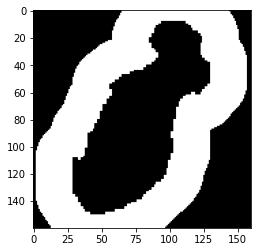

155029.png


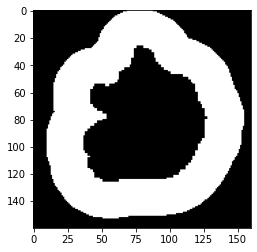

052034.png


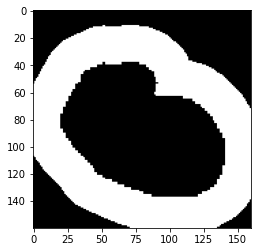

296031.png


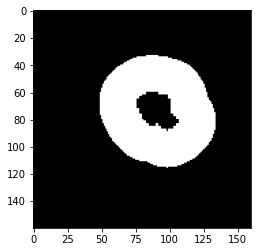

150031.png


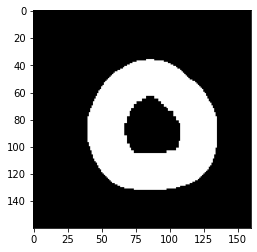

123034.png


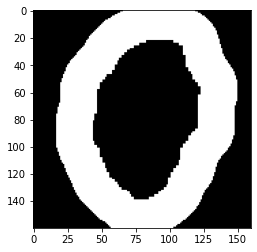

068035.png


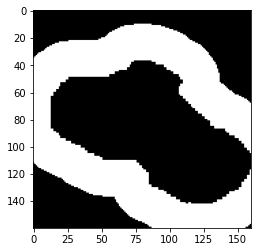

206032.png


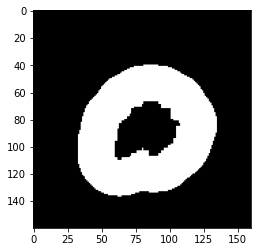

068037.png


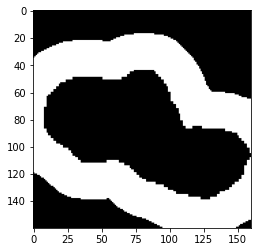

078032.png


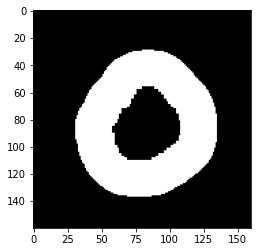

050033.png


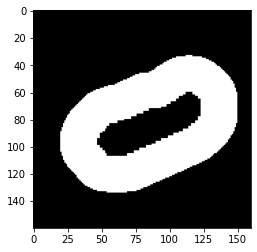

150033.png


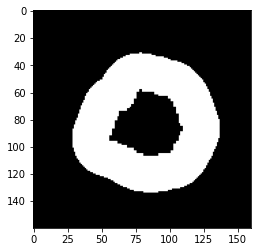

105032.png


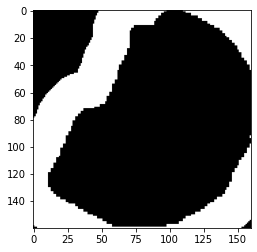

005026.png


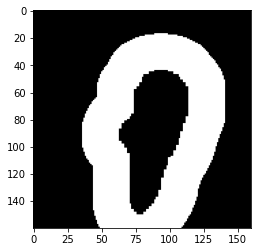

121033.png


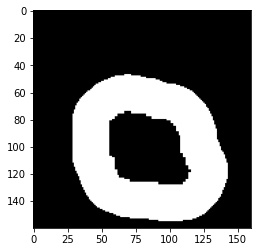

296033.png


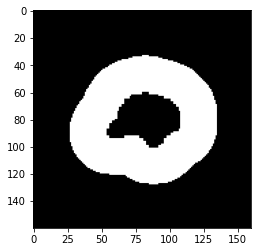

052036.png


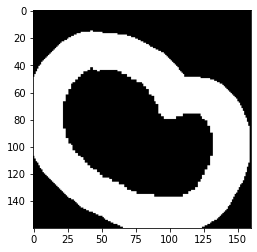

288033.png


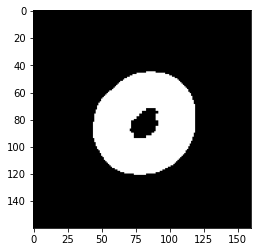

042033.png


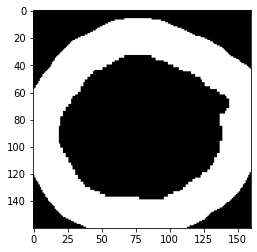

117026.png


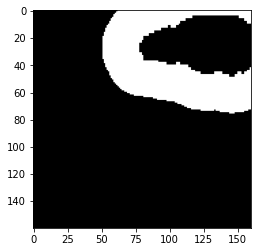

288032.png


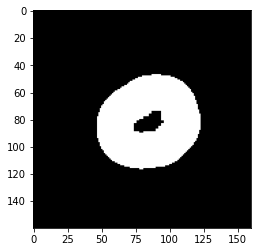

296032.png


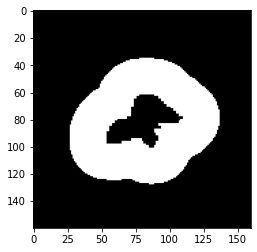

121032.png


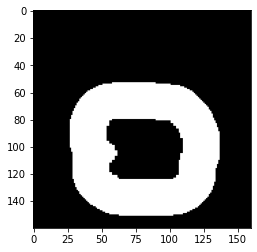

105033.png


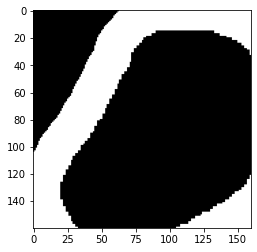

005027.png


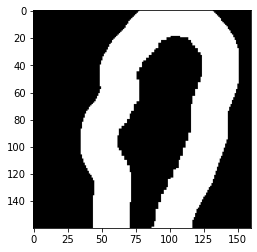

150032.png


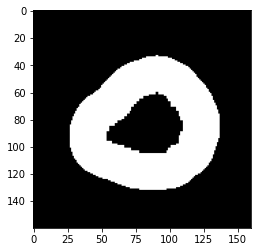

078033.png


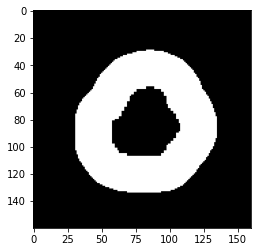

099030.png


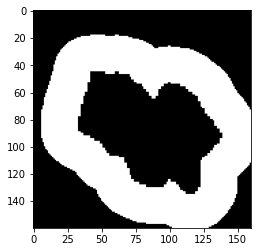

206031.png


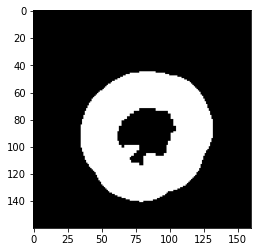

068036.png


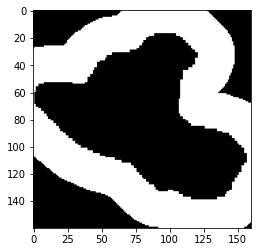

In [13]:
lung_seg_dic={}
for file in os.listdir(os.path.join(path,'train_image')):
    if not file.endswith('.png'):
        continue
    ct=io.imread(os.path.join(path,'train_image',file),cv2.IMREAD_UNCHANGED)
    mask=io.imread(os.path.join(path,'mask',file),cv2.IMREAD_UNCHANGED)
    binary_img=ct.copy()

    kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (55,55))
    dilation_mask=cv2.dilate(mask,kernel,iterations=1)
    
    for i in range(0,len(mask)):
        for j in range(0,len(mask[i])):
            if mask[i][j]>206:
                dilation_mask[i][j]=0 # black
    
    print(file)
    plt.imshow(dilation_mask,cmap='gray')
    plt.show()
    cv2.imwrite(os.path.join(path,'dilation15_mask',file),dilation_mask)
    